Download and analyze this dataset about New York Airbnb listings. Note that there are some missing values.

For this assignment, you should work in a notebook, create plots, and write some markdown comments as you go through the data. First, load the file and understand what each column represents. Then, try to extract some sort of knowledge from the data.

For example, you may look at the top 10 most expensive listings on the ladder, or the top 10 most reviewed. See if there is a high correlation between different columns and draw some conclusions. You may take a closer look at a particular listing, make an analysis per room type, or make a comparison between neighbourhood groups.

Be creative.

# Playing with functions

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
df["neighbourhood_group"].value_counts()

,count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [7]:
df["host_name"].value_counts()

,count
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279
...,...
Pujan,1
Raheem,1
Rusaa,1


In [8]:
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


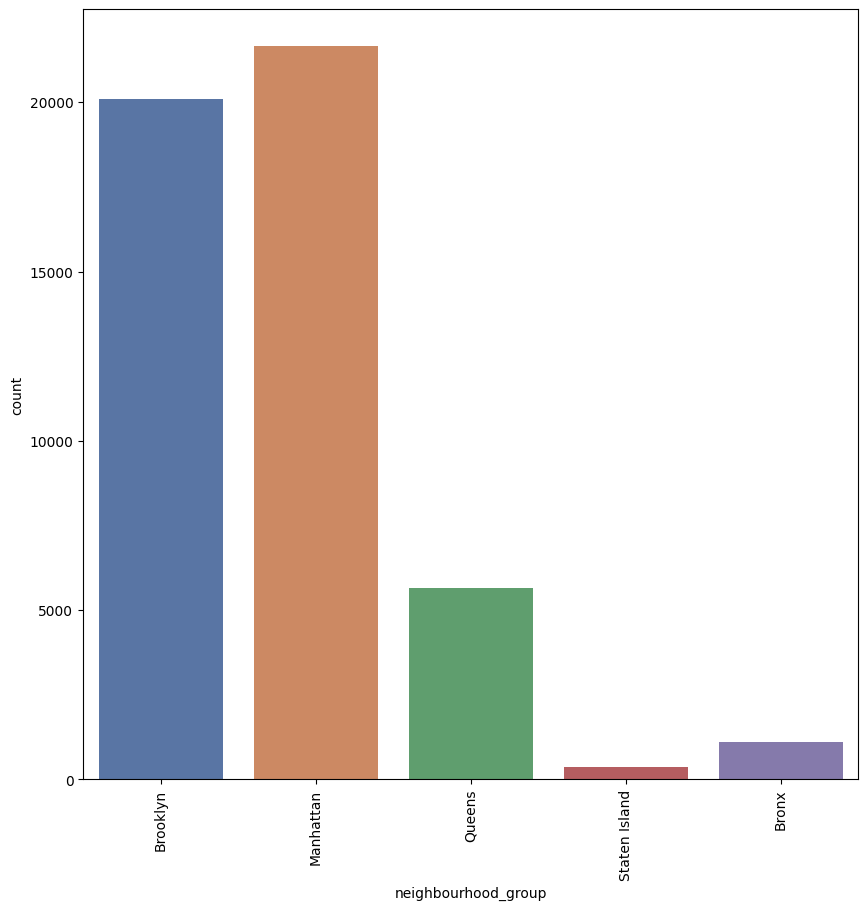

In [9]:
plt.figure(figsize=(10,10))
palette = sns.husl_palette(24, h=240)
sns.countplot(x="neighbourhood_group", data=df, palette="deep", hue="neighbourhood_group", legend=False)
plt.xticks(rotation=90)
plt.show()

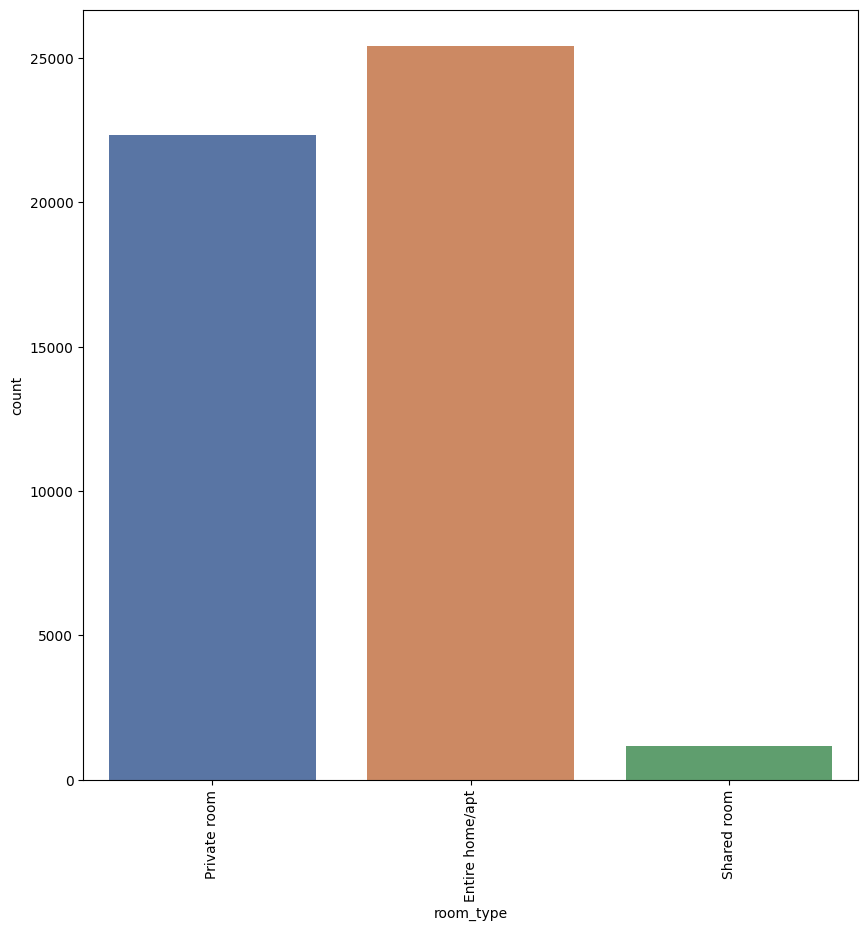

In [10]:
plt.figure(figsize=(10,10))
palette = sns.husl_palette(24, h=240)
sns.countplot(x="room_type", data=df, palette="deep", hue="room_type", legend=False)
plt.xticks(rotation=90)
plt.show()

Number of reviews vs Price

Brooklyn: 6500
Brooklyn: 8000
Manhattan: 9999
Queens: 10000
Manhattan: 9999
Brooklyn: 10000
Manhattan: 10000
Manhattan: 7703
Manhattan: 6419
Manhattan: 8500
Manhattan: 6500
Manhattan: 9999
Manhattan: 7500
Manhattan: 6800
Brooklyn: 7500
Manhattan: 6500


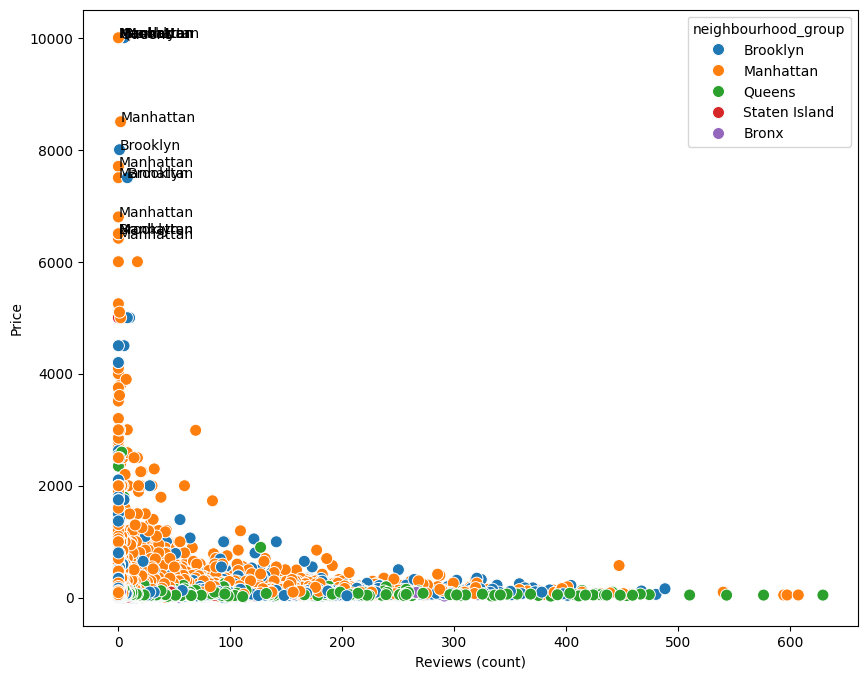

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.scatterplot(x="number_of_reviews", y="price",hue="neighbourhood_group", data=df, s=75, color="coral")
plt.xlabel("Reviews (count)")
plt.ylabel("Price")
for _, row in df.iterrows():
    if row["price"] > 6000:
        print(row["neighbourhood_group"] + ": " + str(row["price"]))
        ax.annotate(row["neighbourhood_group"], (row["number_of_reviews"], row["price"]))

We can see that the smaller the price the more reviews there are for an airbnb

Brooklyn: 6500
Brooklyn: 8000
Manhattan: 9999
Queens: 10000
Manhattan: 9999
Brooklyn: 10000
Manhattan: 10000
Manhattan: 7703
Manhattan: 6419
Manhattan: 8500
Manhattan: 6500
Manhattan: 9999
Manhattan: 7500
Manhattan: 6800
Brooklyn: 7500
Manhattan: 6500


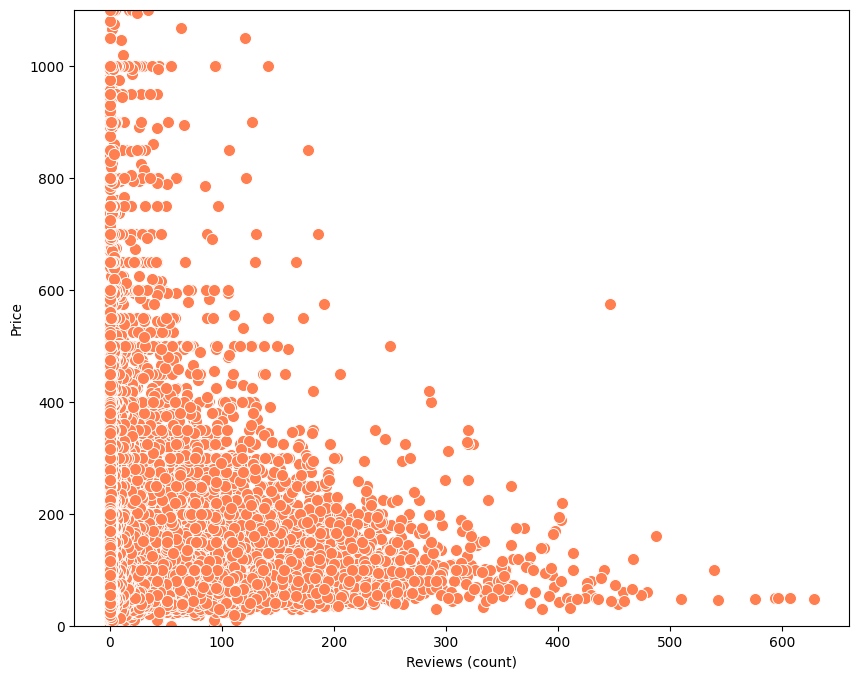

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.scatterplot(x="number_of_reviews", y="price", data=df, s=75, color="coral")
plt.ylim((0, 1100))
plt.xlabel("Reviews (count)")
plt.ylabel("Price")
for _, row in df.iterrows():
    if row["price"] > 6000:
        print(row["neighbourhood_group"] + ": " + str(row["price"]))
        ax.annotate(row["neighbourhood_group"], (row["number_of_reviews"], row["price"]))

# Trying to create a map of the airbnbs

Loading the image and the csv

In [13]:
import cv2

nyc_img = cv2.imread('/content/New_York_City_.png')
df = pd.read_csv('/content/AB_NYC_2019.csv')

We need to determine the image`s boundaries

In [14]:
img_height, img_width, _ = nyc_img.shape
print(f"Image height: {img_height}, Image width: {img_width}")

Image height: 1291, Image width: 1326


Get the minimum and maximum latitude and longitude values from the dataframe



In [15]:
min_latitude = df['latitude'].min()
max_latitude = df['latitude'].max()
min_longitude = df['longitude'].min()
max_longitude = df['longitude'].max()
min_latitude, max_latitude, min_longitude, max_longitude

(40.49979, 40.91306, -74.24442, -73.71299)

We need to create a function to scale the latitude and longitude data to the image dimensions.
We dont actually verify that the points on the map are accurate, we are actually plotting the points according to the image size.
In order to be more exact, after plotting, based on the results we can adjust the scaled coordinates by shifting them in a certain direction.


In [16]:
def scale_coordinates(latitude, longitude, min_latitude, max_latitude, min_longitude, max_longitude, img_height, img_width):
    """
    Scales latitude and longitude to image coordinates.

    Args:
        latitude: The latitude value to scale.
        longitude: The longitude value to scale.
        min_latitude: The minimum latitude in the dataset.
        max_latitude: The maximum latitude in the dataset.
        min_longitude: The minimum longitude in the dataset.
        max_longitude: The maximum longitude in the dataset.
        img_height: The height of the target image.
        img_width: The width of the target image.

    Returns:
        A tuple containing the scaled longitude and scaled latitude.
    """
    scaled_longitude = (longitude - min_longitude) * img_width / (max_longitude - min_longitude)
    scaled_latitude = img_height - (latitude - min_latitude) * img_height / (max_latitude - min_latitude) # Invert latitude for image coordinates
    return scaled_longitude, scaled_latitude

Now that we have the scaled dimensions, we`re going to put the points from the airbnbs coordinates on the image

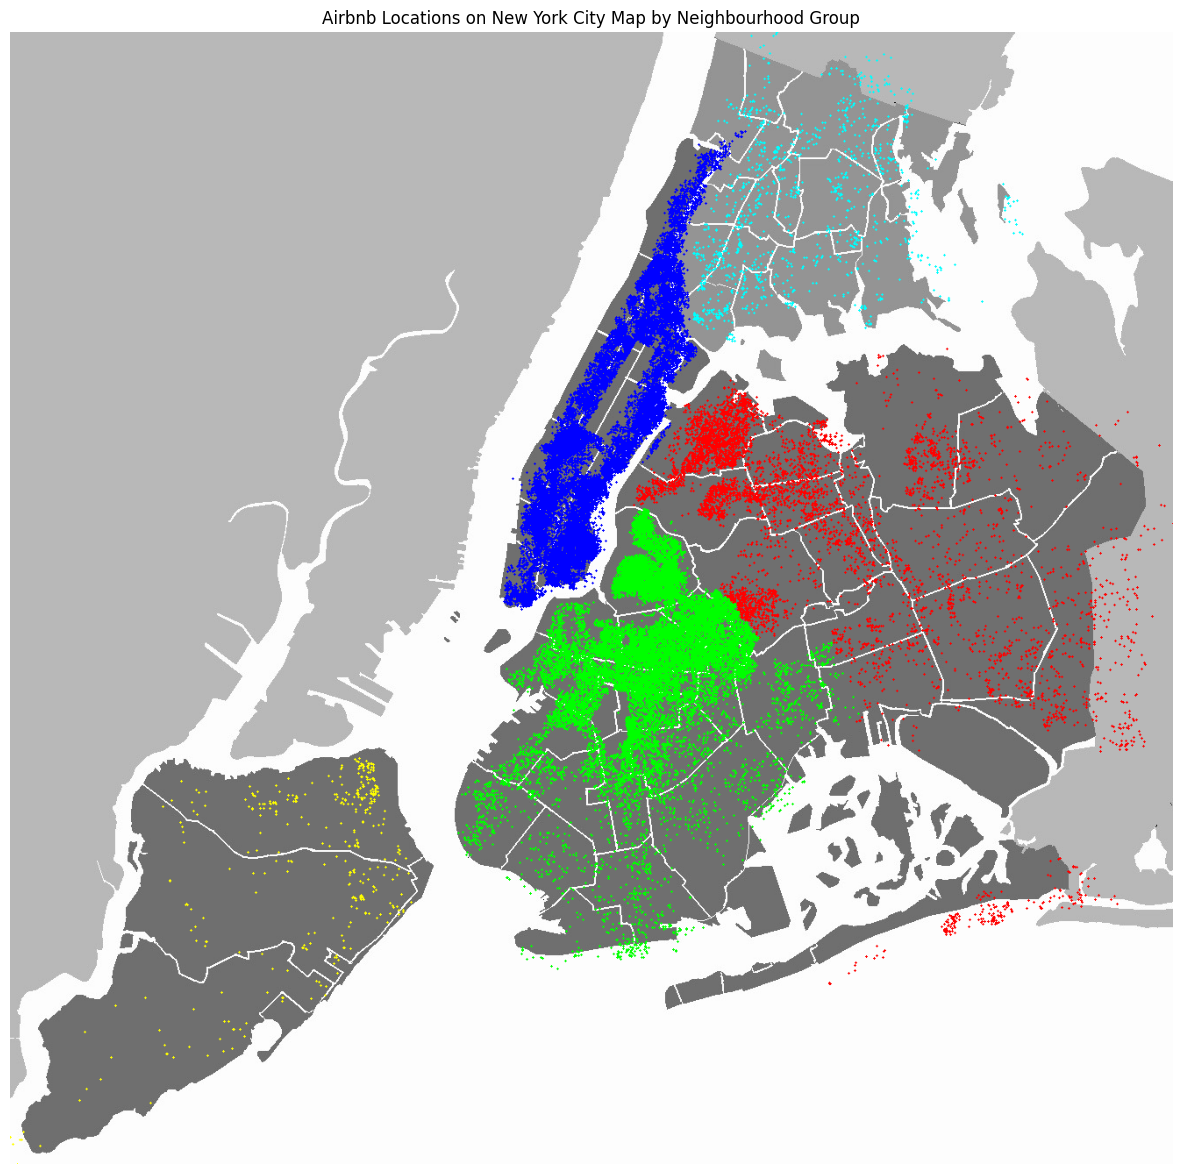

In [17]:
# we`ll define colors for each neighbourhood_group so that we can see if the representation is close
group_colors = {
    'Manhattan': (255, 0, 0),  # Blue
    'Brooklyn': (0, 255, 0),   # Green
    'Queens': (0, 0, 255),     # Red
    'Bronx': (255, 255, 0),    # Cyan
    'Staten Island': (0, 255, 255) # Yellow
}

# Create a copy of the image to draw on
nyc_img_colored = nyc_img.copy()

for index, row in df.iterrows():
    scaled_lon, scaled_lat = scale_coordinates(row['latitude'], row['longitude'], min_latitude, max_latitude, min_longitude, max_longitude, img_height, img_width)
    neighbourhood_group = row['neighbourhood_group']
    color = group_colors.get(neighbourhood_group, (128, 128, 128)) # Default to gray if group not in dict
    cv2.circle(nyc_img_colored, (int(scaled_lon), int(scaled_lat)), 1, color, -1)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(nyc_img_colored, cv2.COLOR_BGR2RGB))
plt.title("Airbnb Locations on New York City Map by Neighbourhood Group")
plt.axis('off')
plt.show()

**Observations**
We can see that the points aren t accurate, they form the shape of the neighbourhood groups but there are some airbnbs floating on the water :))))
Let`s try to shift them a little bit North by subtracting little by little from the result of the scaled coordinates, in our case the latitude

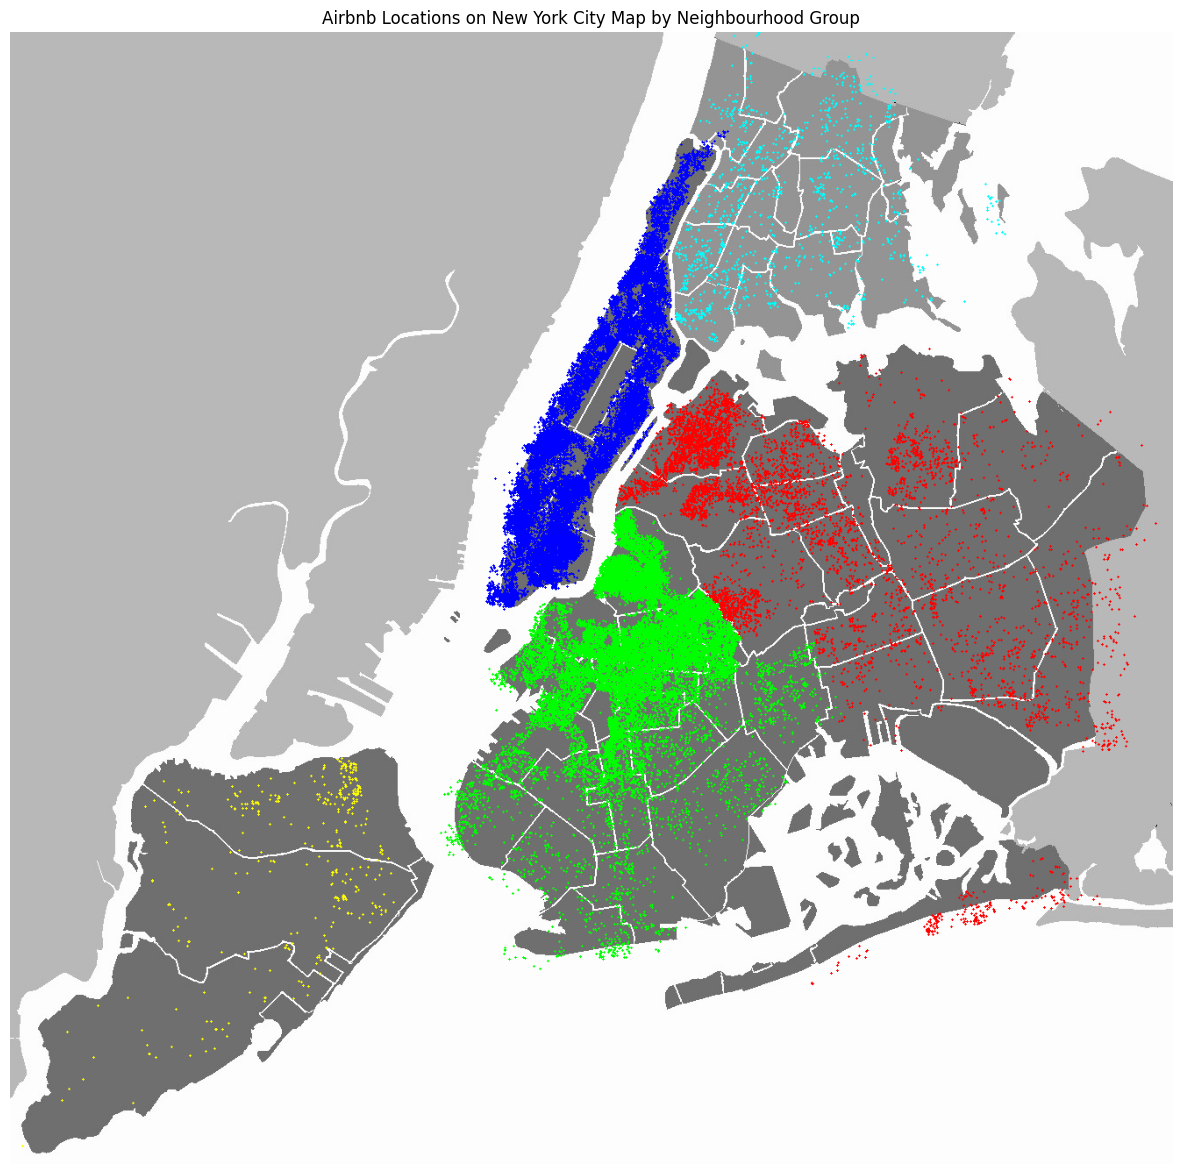

In [18]:
# we`ll define colors for each neighbourhood_group so that we can see if the representation is close
group_colors = {
    'Manhattan': (255, 0, 0),  # Blue
    'Brooklyn': (0, 255, 0),   # Green
    'Queens': (0, 0, 255),     # Red
    'Bronx': (255, 255, 0),    # Cyan
    'Staten Island': (0, 255, 255) # Yellow
}

# Create a copy of the image to draw on
nyc_img_colored = nyc_img.copy()

for index, row in df.iterrows():
    scaled_lon, scaled_lat = scale_coordinates(row['latitude'], row['longitude'], min_latitude, max_latitude, min_longitude, max_longitude, img_height, img_width)
    neighbourhood_group = row['neighbourhood_group']
    color = group_colors.get(neighbourhood_group, (128, 128, 128)) # Default to gray if group not in dict
    adjusted_lon = scaled_lon - 20
    cv2.circle(nyc_img_colored, (int(adjusted_lon), int(scaled_lat)), 1, color, -1)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(nyc_img_colored, cv2.COLOR_BGR2RGB))
plt.title("Airbnb Locations on New York City Map by Neighbourhood Group")
plt.axis('off')
plt.show()

**We notice that the points on the map are too spreaded in all directions outside the neighbourhood_groups, therefore we need to decrease the image size values**

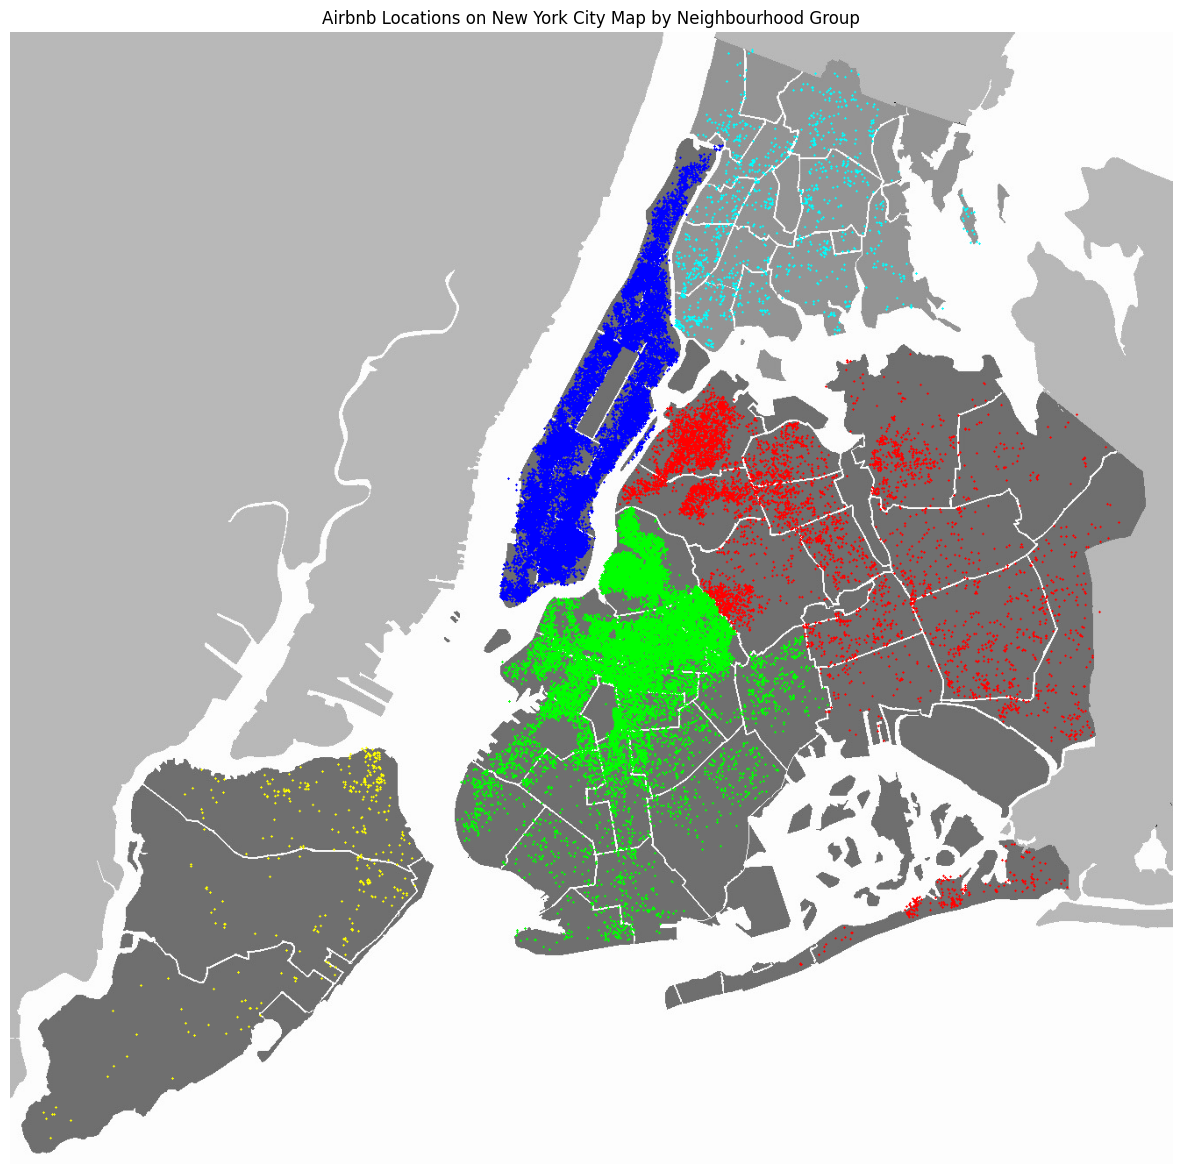

In [19]:
# we`ll define colors for each neighbourhood_group so that we can see if the representation is close
group_colors = {
    'Manhattan': (255, 0, 0),  # Blue
    'Brooklyn': (0, 255, 0),   # Green
    'Queens': (0, 0, 255),     # Red
    'Bronx': (255, 255, 0),    # Cyan
    'Staten Island': (0, 255, 255) # Yellow
}

# Create a copy of the image to draw on
nyc_img_colored = nyc_img.copy()

for index, row in df.iterrows():
    scaled_lon, scaled_lat = scale_coordinates(row['latitude'], row['longitude'], min_latitude, max_latitude, min_longitude, max_longitude, img_height-50, img_width-100)
    neighbourhood_group = row['neighbourhood_group']
    color = group_colors.get(neighbourhood_group, (128, 128, 128)) # Default to gray if group not in dict
    adjusted_lon = scaled_lon + 38
    adjusted_lat = scaled_lat +20
    cv2.circle(nyc_img_colored, (int(adjusted_lon), int(adjusted_lat)), 1, color, -1)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(nyc_img_colored, cv2.COLOR_BGR2RGB))
plt.title("Airbnb Locations on New York City Map by Neighbourhood Group")
plt.axis('off')
plt.show()

Computing the median of the price in order to have a more accurate price grouping

In [24]:
np.median(df["price"])


np.float64(106.0)

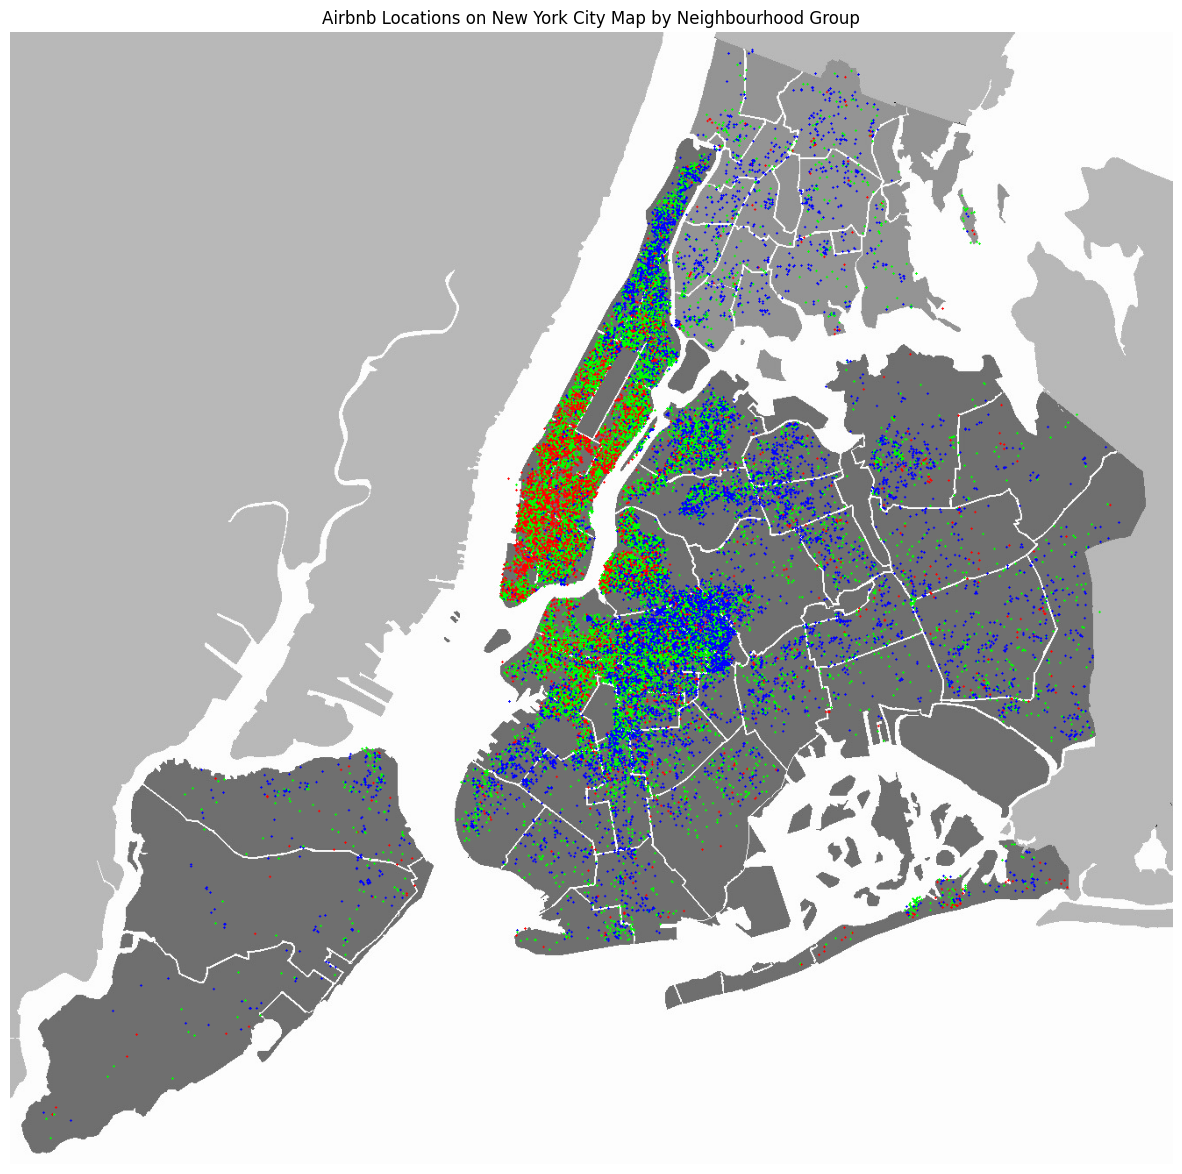

In [23]:
#sort price in ranges
price_colors = {
  'low': (255, 0, 0),  # Blue
  'medium': (0, 255, 0),   # Green
  'high': (0, 0, 255),     # Red
}

# Create a copy of the image to draw on
nyc_img_colored = nyc_img.copy()

for index, row in df.iterrows():
    scaled_lon, scaled_lat = scale_coordinates(row['latitude'], row['longitude'], min_latitude, max_latitude, min_longitude, max_longitude, img_height-50, img_width-100)
    price = row['price']
    if price < 80:
      color = price_colors.get('low', (128, 128, 128))
    elif price < 200:
      color = price_colors.get('medium', (128, 128, 128))
    else:
      color = price_colors.get('high', (128, 128, 128))

    adjusted_lon = scaled_lon + 38
    adjusted_lat = scaled_lat +20
    cv2.circle(nyc_img_colored, (int(adjusted_lon), int(adjusted_lat)), 1, color, -1)


plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(nyc_img_colored, cv2.COLOR_BGR2RGB))
plt.title("Airbnb Locations on New York City Map by Neighbourhood Group")
plt.axis('off')
plt.show()

np.float64(106.0)